## Income Classification Model

### Introduction

The income dataset was extracted from 1994 U.S. Census database.

### Objective of the project

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

Source:
adult data set
Income dataset

### The importance of census statistics

The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

* 1. [Introduction](#intro)
    * 1.1  [Objective of the project](#objective)
    * 1.2  [The importance of census statistics](#imp_census_stats)
* 2.  [Fetching Data](#fetch)
    * 2.1  [Import Package and Data](#import_lib)
    * 2.2  [Data Dictionary](#data_dict)
* 3.  [Data Cleaning](#data_cleaning)
    * 3.1  [Dealing with Missing Value](#missing_value)
* 4.  [Feature Engineering](#feature_eng)
    * 4.1  [Predclass](#pred_class)
    * 4.2  [Education](#edu)
    * 4.3  [Marital-status](#marital_status)
    * 4.4  [Occupation](#occupation)
    * 4.5  [Workclass](#work_class)
    * 4.6  [age](#age)
    * 4.7  [Race](#race)
    * 4.8  [Hours of Work](#hrs_of_work)
    * 4.9  [Create a crossing feature: Age + hour of work](#age_hour)
* 5.  [EDA](#eda)
    * 5.1  [Pair Plot](#pair_plot)
    * 5.2  [Correlation Heatmap](#corr_heatmap)
    * 5.3  [age vs. income level](#age_income)
    * 5.4  [Working hour vs. income level](#workhour_vs_incomelevel)
    * 5.5  [Occupation vs. Income Level](#occupation_vs_incomelevel)
    * 5.6  [Bivariate Analysis](#bivariate_analysis)
    * 5.7  [Race vs. Income Level](#race_vs_incomelevel)
* 6.  [Building Machine Learning Models](#ml_models)
    * 6.1  [Feature Encoding](feature_encoding)
    * 6.2  [Train-test split](train_test_split)
    * 6.3  [Principal Component Analysis (PCA)](#pca)
    * 6.4  [Classification Models](#classification_models)
        * 6.4.1  [Perceptron Method](#perceptron)
        * 6.4.2  [Gaussian Naive Bayes](#gaussian_naive_bayes)
        * 6.4.3  [Linear Support Vector Machine](#linear_support_vector)
        * 6.4.4  [Radical Support Vector Machine](#radical_support_vector)
        * 6.4.5  [Logistic Regression](#logistic_regression)
        * 6.4.6  [Random Forest](#random_forest)
        * 6.4.7  [K-Nearest Neighbors](#knn)
    * 6.5  [Cross Validation](#cross_validation)
        * 6.5.1  [GridSearch](#grid_search)
* 7.  [Reflection](#reflection)

## Fetching Data <a name="fetch"></a>

### Import Package and Data <a name="import_lib"></a> 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [46]:
income_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names =  ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
income_df = pd.read_csv(income_data, na_values=[" ?"],
                         header=None, 
                         names = names)
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
income_df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [48]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  predclass       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Dictionary <a name="data_dict"></a> 
****

* **1. Categorical Attributes**

* `workclass`: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * Individual work category
* `education`: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * Individual's highest education degree
* `marital-status`: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
     * Individual marital status
* `occupation`: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
     * Individual's occupation
* `relationship`: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
     * Individual's relation in a family
* `race`: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * Race of Individual
* `sex`: (categorical) Female, Male.
* `native-country`: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * Individual's native country


* **2. Continuous Attributes**

* `age`: continuous.
    * Age of an individual
* `education-num`: number of education year, continuous.
    * Individual's year of receiving education
* `fnlwgt`: final weight, continuous.
    * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
* `capital-gain`: continuous.
* `capital-loss`: continuous.
* `hours-per-week`: continuous.
    * Individual's working hour per week

## Data Cleaning<a name='data_cleaning'></a>

### Dealing with Missing value <a name='missing_value'></a>

In [49]:
income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
predclass            0
dtype: int64

Attributes workclass, occupation, and native-country most NAs. Let's drop these NA.

In [50]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [51]:
new_df = income_df.dropna()

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  object 
 2   fnlwgt          30162 non-null  int64  
 3   education       30162 non-null  object 
 4   education-num   30162 non-null  int64  
 5   marital-status  30162 non-null  object 
 6   occupation      30162 non-null  object 
 7   relationship    30162 non-null  object 
 8   race            30162 non-null  object 
 9   sex             30162 non-null  object 
 10  capital-gain    30162 non-null  int64  
 11  capital-loss    30162 non-null  int64  
 12  hours-per-week  30162 non-null  float64
 13  native-country  30162 non-null  object 
 14  predclass       30162 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [53]:
new_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
dtype: int64

## Feature Engineering <a name="feature_eng"></a>

In [54]:
print('workclass',new_df.workclass.value_counts())
print('education',new_df.education.value_counts())
print('marital-status',new_df['marital-status'].value_counts())
print('occupation',new_df.occupation.value_counts())
print('relationship',new_df.relationship.value_counts())
print('race',new_df.race.value_counts())
print('sex',new_df.sex.value_counts())
print('native-country',new_df['native-country'].value_counts())
print('predclass',new_df.predclass.value_counts())

workclass  Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education  HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
marital-status  Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64
occupation  Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical

### Pred class <a name="pred_class"></a>

<AxesSubplot:xlabel='count', ylabel='predclass'>

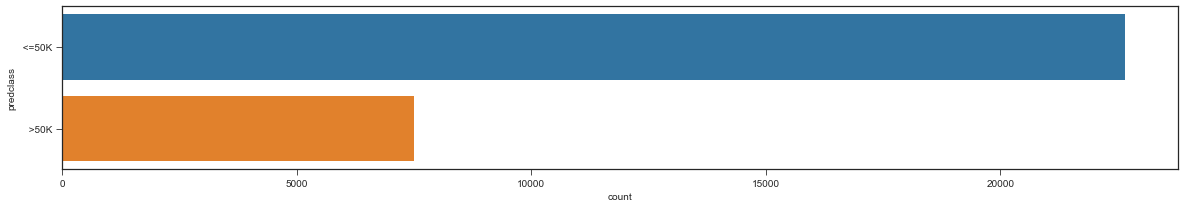

In [55]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')

sns.countplot(y="predclass", data=new_df, order=new_df['predclass'].value_counts().index)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

### Education <a name="edu"></a>

In [56]:
new_df['education'].replace(' Preschool', 'dropout',inplace=True)
new_df['education'].replace(' 10th', 'dropout',inplace=True)
new_df['education'].replace(' 11th', 'dropout',inplace=True)
new_df['education'].replace(' 12th', 'dropout',inplace=True)
new_df['education'].replace(' 1st-4th', 'dropout',inplace=True)
new_df['education'].replace(' 5th-6th', 'dropout',inplace=True)
new_df['education'].replace(' 7th-8th', 'dropout',inplace=True)
new_df['education'].replace(' 9th', 'dropout',inplace=True)
new_df['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
new_df['education'].replace(' HS-grad', 'HighGrad',inplace=True)
new_df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
new_df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
new_df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
new_df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
new_df['education'].replace(' Masters', 'Masters',inplace=True)
new_df['education'].replace(' Prof-school', 'Masters',inplace=True)
new_df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [57]:
new_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.249885
0,Bachelors,13.000000
1,CommunityCollege,10.369510
3,HighGrad,9.000000
5,dropout,5.609730


<AxesSubplot:xlabel='count', ylabel='education'>

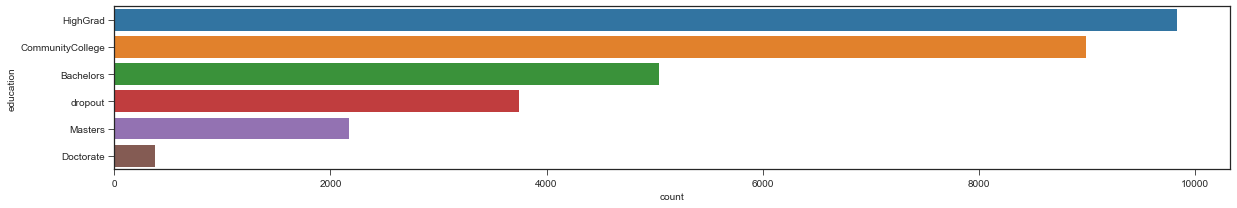

In [58]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')

sns.countplot(y="education", data=new_df, order=new_df['education'].value_counts().index)

### MaritalStatus<a name="marital_status"></a>

In [59]:
new_df['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
new_df['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
new_df['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
new_df['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
new_df['marital-status'].replace([' Separated'], 'Separated',inplace=True)
new_df['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
new_df['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<AxesSubplot:xlabel='count', ylabel='marital-status'>

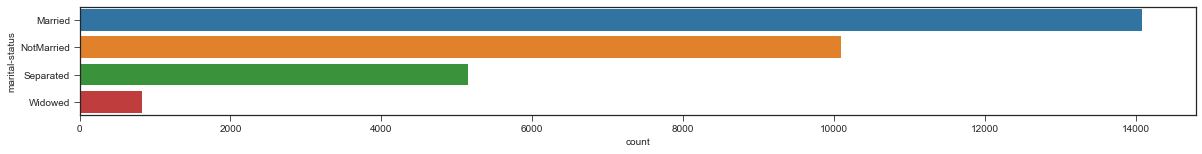

In [60]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')

sns.countplot(y="marital-status", data=new_df, order=new_df['marital-status'].value_counts().index)

### Occupation <a name="occupation"></a>

<AxesSubplot:xlabel='count', ylabel='occupation'>

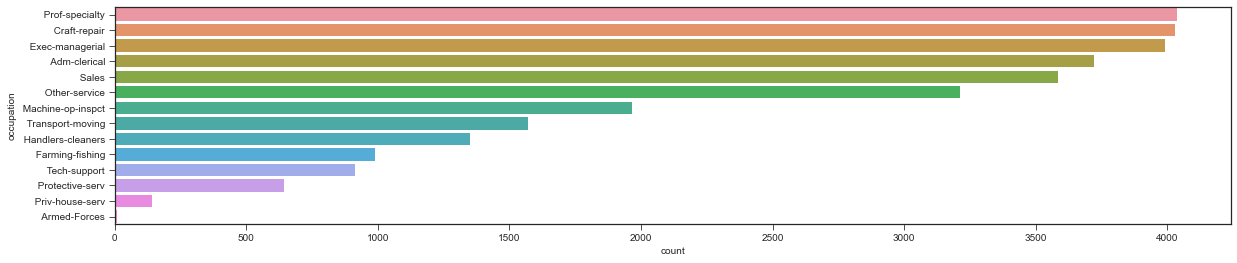

In [61]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=new_df, order=new_df['occupation'].value_counts().index)

### Workclass<a name="work_class"></a>

<AxesSubplot:xlabel='count', ylabel='workclass'>

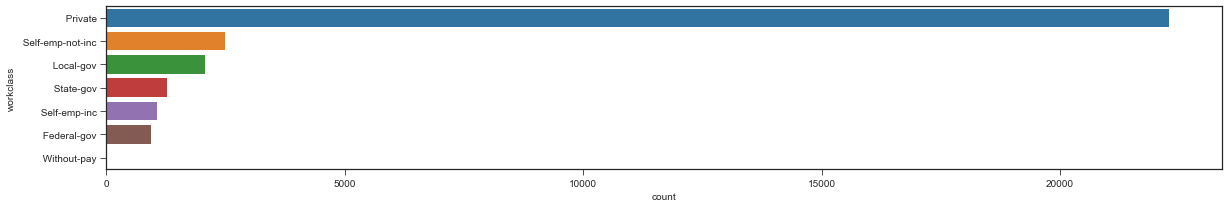

In [62]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=new_df, order=new_df['workclass'].value_counts().index)

### Age<a name="age"></a>

In [63]:
# make the age variable discretized 
new_df['age_bin'] = pd.cut(new_df['age'], 20)

<ipython-input-63-83db87312381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age_bin'] = pd.cut(new_df['age'], 20)


In [64]:
new_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,43.95911
0,<=50K,36.60806


### Race<a name="race"></a>

<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 1440x360 with 0 Axes>

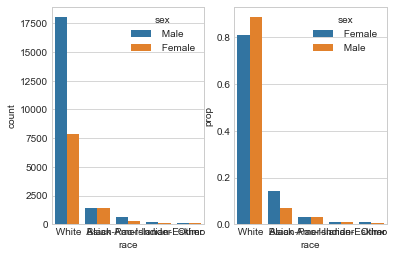

In [65]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"

plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)

sns.countplot(x=x, hue=hue, data=new_df, ax=axes[0])

prop_df = (new_df[x]
           .groupby(new_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

### Hours of Work<a name="hrs_of_work"></a>

In [66]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
new_df['hours-per-week_bin'] = pd.cut(new_df['hours-per-week'], 10)
new_df['hours-per-week'] = new_df['hours-per-week']

<ipython-input-66-a7f54ce9ae9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['hours-per-week_bin'] = pd.cut(new_df['hours-per-week'], 10)
<ipython-input-66-a7f54ce9ae9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['hours-per-week'] = new_df['hours-per-week']


### Create a crossing feature: Age + hour of work<a name="age_hour"></a>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

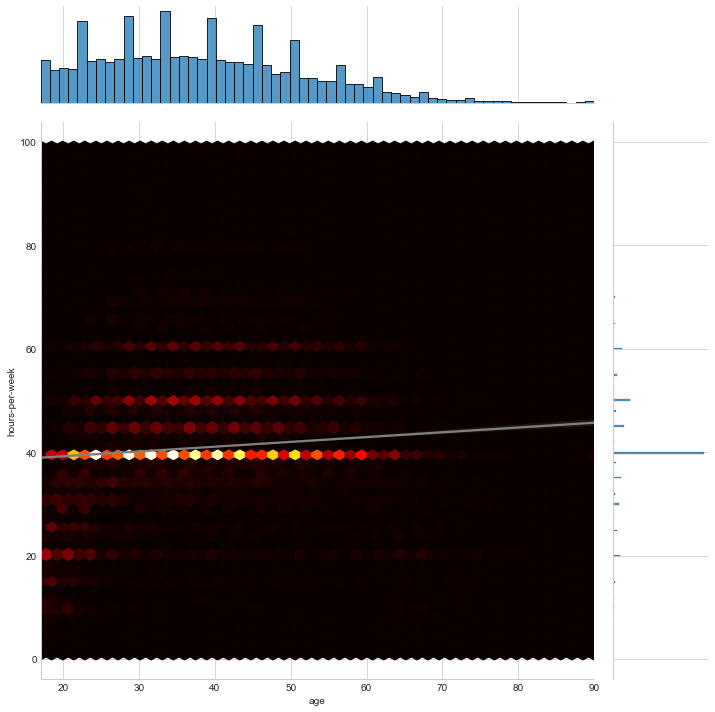

In [67]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = new_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

sns.regplot(new_df.age, new_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

In [68]:
# Crossing Numerical Features
new_df['age-hours'] = new_df['age']*new_df['hours-per-week']
new_df['age-hours_bin'] = pd.cut(new_df['age-hours'], 10)

<ipython-input-68-708451b98ee8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age-hours'] = new_df['age']*new_df['hours-per-week']
<ipython-input-68-708451b98ee8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age-hours_bin'] = pd.cut(new_df['age-hours'], 10)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age-hours', ylabel='Density'>

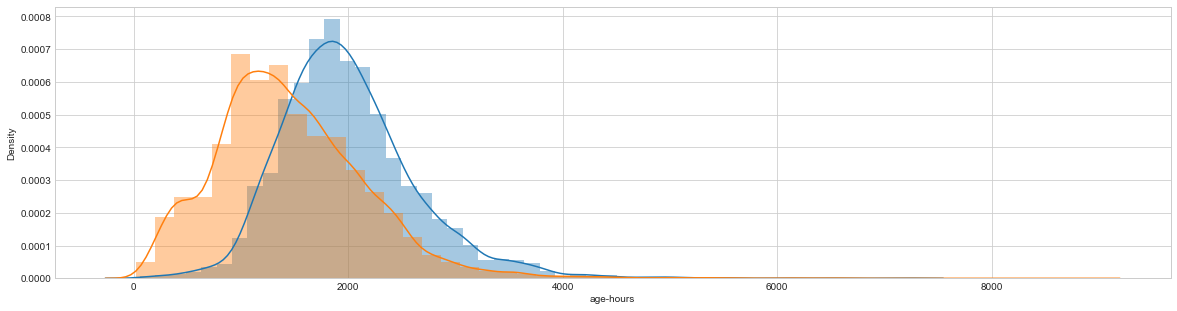

In [69]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 

sns.distplot(new_df[new_df['predclass'] == ' >50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(new_df[new_df['predclass'] == ' <=50K']['age-hours'], kde_kws={"label": "<$50K"})

## EDA <a name="eda"></a>

### Pair Plot <a name="pair-plot"></a>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


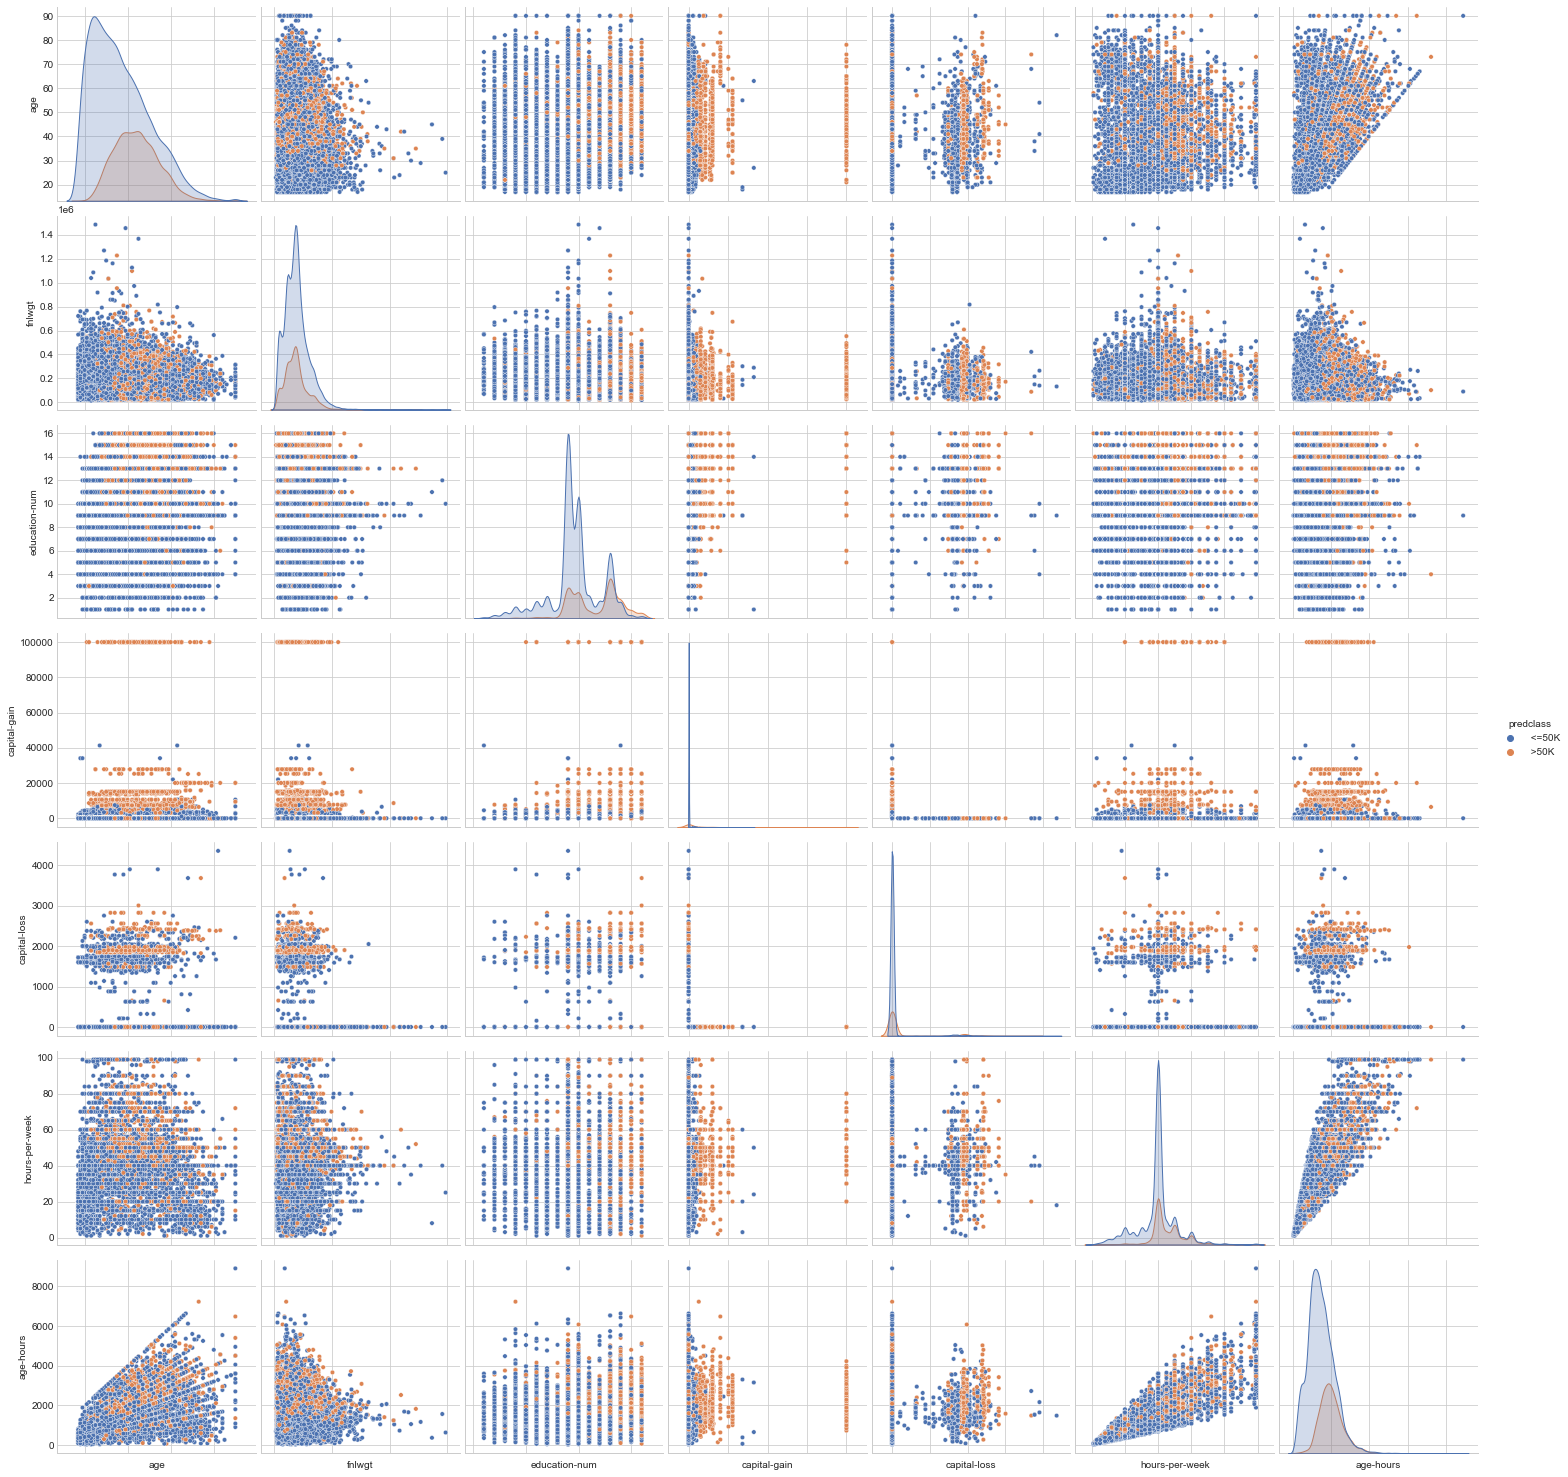

In [70]:
#pair plots of entire dataset
pp = sns.pairplot(new_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Correlation Heatmap <a name="corr_heatmap"></a>

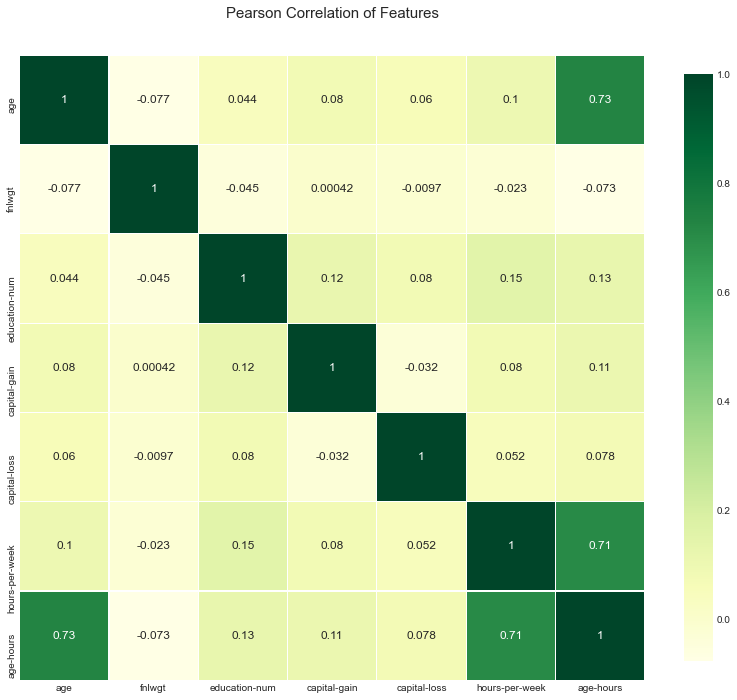

In [71]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(new_df)

### Age vs. Income level <a name="age_income"></a>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

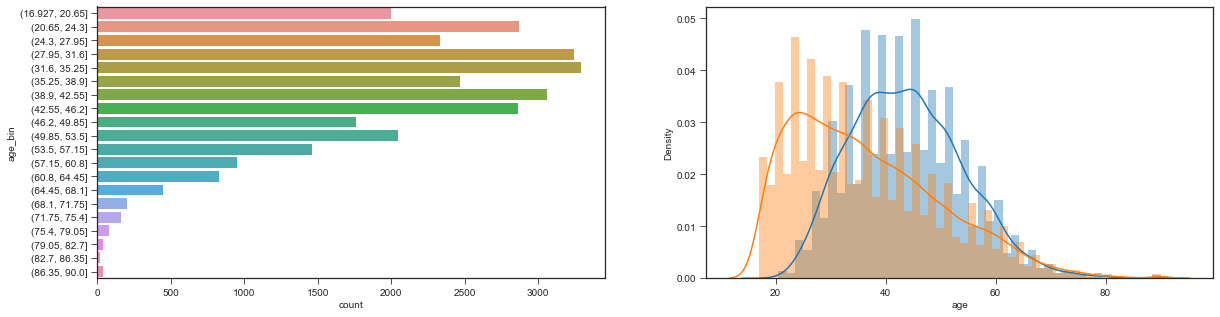

In [72]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 

plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=new_df)

plt.subplot(1, 2, 2)
sns.distplot(new_df[new_df['predclass'] == ' >50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(new_df[new_df['predclass'] == ' <=50K']['age'], kde_kws={"label": "<=$50K"})

### Working hour vs. Income level<a name="workhour_vs_incomelevel"></a>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

(20.0, 60.0)

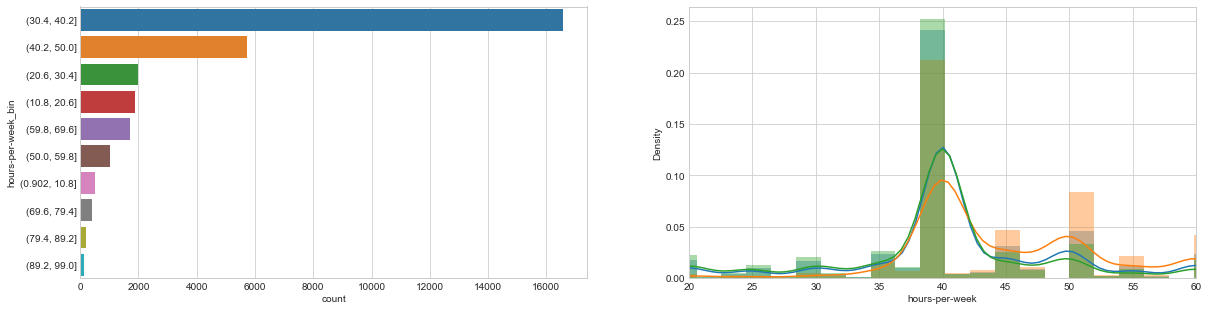

In [73]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 

plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=new_df, order=new_df['hours-per-week_bin'].value_counts().index);

plt.subplot(1, 2, 2)
sns.distplot(new_df['hours-per-week']);
sns.distplot(new_df[new_df['predclass'] == ' >50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(new_df[new_df['predclass'] == ' <=50K']['hours-per-week'], kde_kws={"label": "<$50K"})

plt.ylim(0, None)
plt.xlim(20, 60)

### Occupation vs. Income Level<a name="occupation_vs_incomelevel"></a>

<AxesSubplot:xlabel='occupation', ylabel='age'>

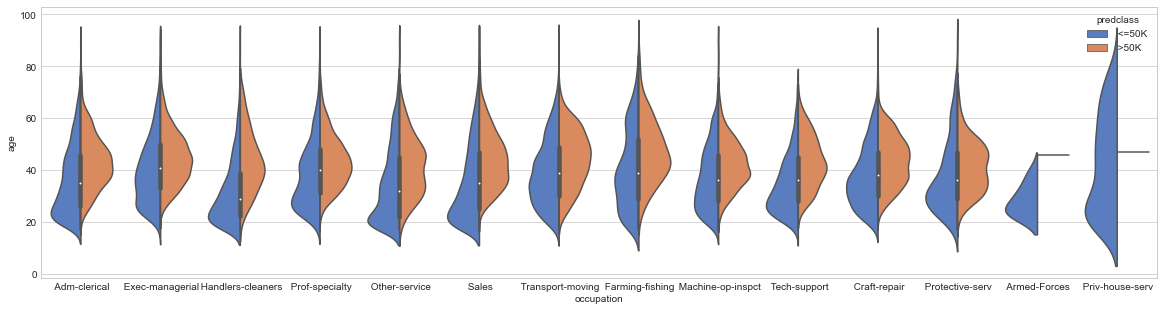

In [74]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=new_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

The general trend is in sync with common sense: more senior workers have higher salaries. Armed-forces don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs.

### Bivariate Analysis <a name="bivariate_analysis"></a>

In [75]:
new_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
32556,27.0,Private,257302,CommunityCollege,12,Married,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
32557,40.0,Private,154374,HighGrad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
32558,58.0,Private,151910,HighGrad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
32559,22.0,Private,201490,HighGrad,9,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
32560,52.0,Self-emp-inc,287927,HighGrad,9,Married,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


<ipython-input-76-5039f63cff4a>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset = dataset.select_dtypes(include=[np.object])
<ipython-input-76-5039f63cff4a>:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
<ipython-input-76-5039f63cff4a>:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Dep

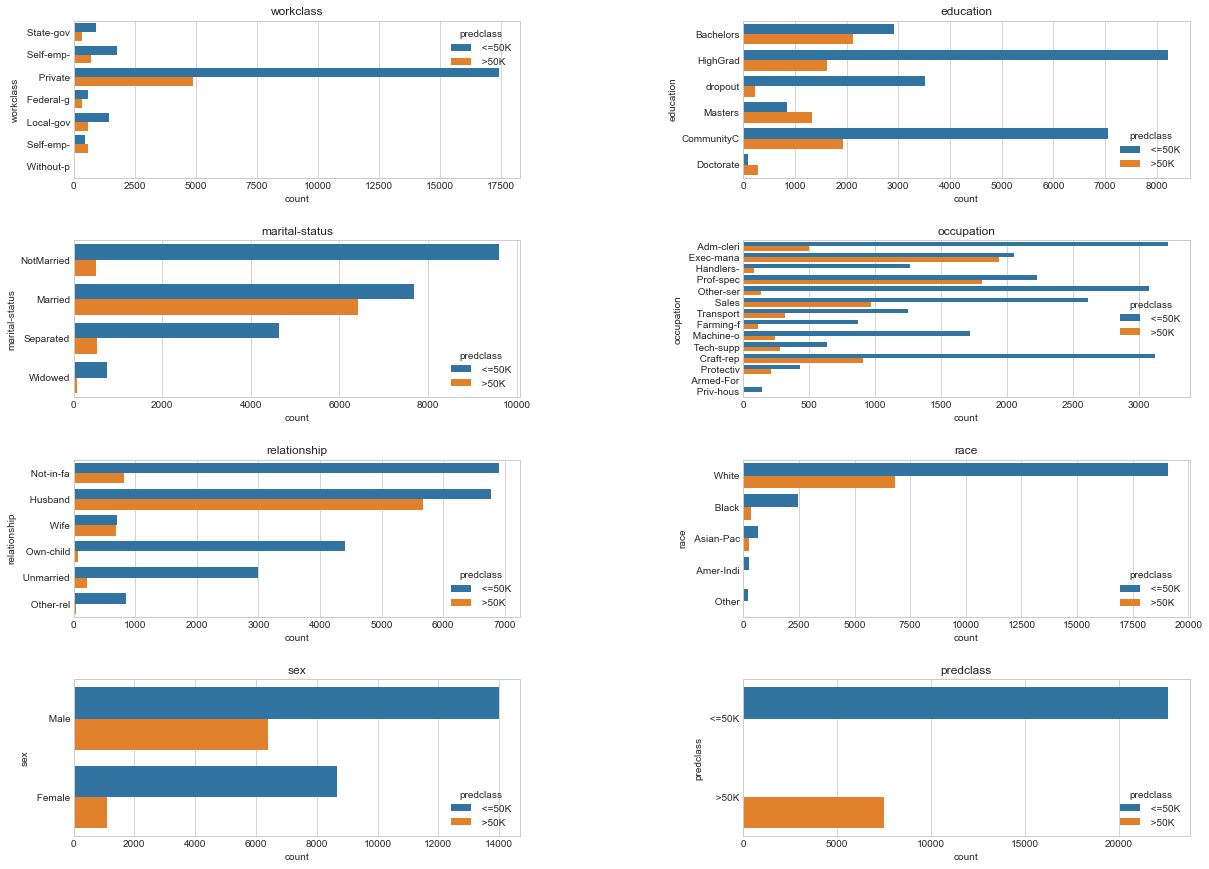

In [76]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = new_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

The dataset was created in 1996, a large number of jobs fall into the category of mannual labor, e.g., Handlers cleaners, craft repairers, etc. Executive managerial role and some one with a professional speciality has a high level payment.

### Race vs. Income Level <a name="race_vs_incomelevel"></a>

<AxesSubplot:xlabel='race', ylabel='age'>

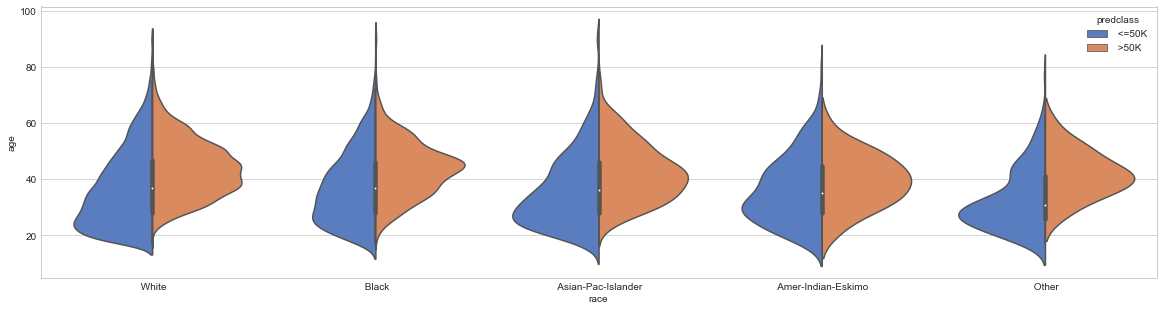

In [78]:
from matplotlib import pyplot

a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=new_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

For income level above $50k, the mean for each race is almost the same at age of 40.

I am personally reserved about this result, since glass-ceiling effects is still prevailing in 21 century not to mention in 1994.

## Building Machine Learning Models <a name="ml_models"></a>

In [79]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
#from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### Feature Encoding <a name="feature_encoding"></a>

In [80]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [81]:
new_df = new_df.apply(LabelEncoder().fit_transform)
new_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,22,5,2491,0,12,1,0,1,4,1,24,0,39,38,0,6,3,589,1
1,33,4,2727,0,12,0,3,0,4,1,0,0,12,38,0,9,1,257,0
2,21,2,13188,3,8,2,5,1,4,1,0,0,39,38,0,5,3,578,1
3,36,2,14354,5,6,0,5,0,2,1,0,0,39,38,0,9,3,766,2
4,11,2,18120,0,12,0,9,5,2,0,0,0,39,4,0,3,3,437,1


### Train-test split<a name="train_test_split"></a>

In [82]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = new_df["predclass"]
X = new_df.drop(drop_elements, axis=1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Principal Component Analysis (PCA) <a name="pca"></a>

In [84]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

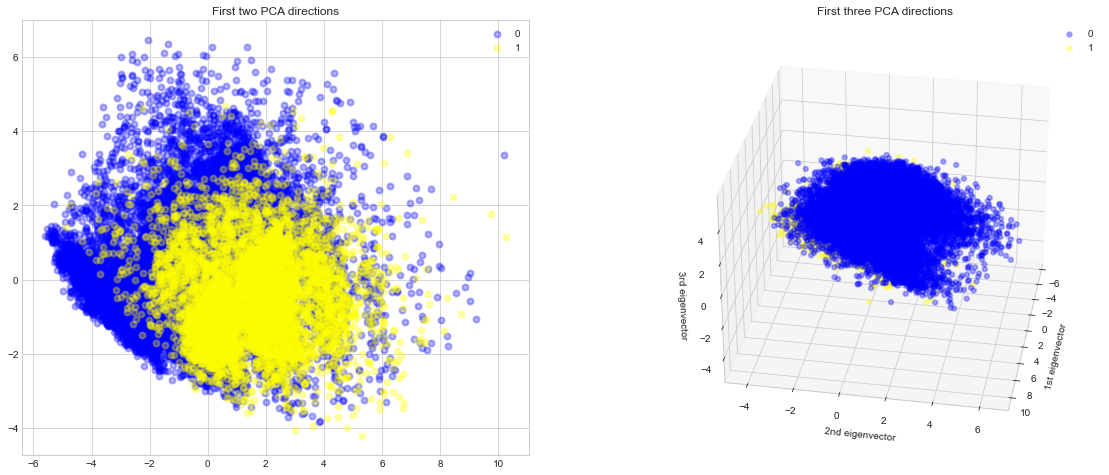

In [85]:
# PCA's components graphed in 2D and 3D

# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(new_df.drop('predclass', axis=1))
X = std_scale.transform(new_df.drop('predclass', axis=1))
y = new_df['predclass']

# 1 Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3

# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [86]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.21306431, 0.33125071, 0.4180646 , 0.4992456 , 0.57921107,
       0.65429665, 0.72767437, 0.79970128, 0.86881165, 0.92652272,
       0.96866435, 0.99829882, 1.        ])

PCA in this project is my attempt to get a sense of how to implement it.

Of course, since income is a classification project rather than a clustering one, it's not necessary to do PCA to reduce attributes dimensions.

As show in the above result, it takes 10 variables to achieve more than 90% of explanation vs. the original number of variables is 14. No significant reduction happens due to the nature of this dataset, so there is not much meaning in carrying out PCA.

## Classification Models <a name="classification_models"></a>

### Perceptron Model <a name="perceptron"></a>

In [87]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [88]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7062821150339798

In [89]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7958357185347961

### Gaussian Naive Bayes<a name="gaussian_naive_bayes"></a>

In [90]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8130283441074092


### Linear Support Vector  <a name="linear_support_vector"></a>

In [91]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.747886623570363


### Radical Support Vector<a name="radical_support_vector"></a>

In [92]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.747886623570363


### Logistic Regression<a name="logistic_regression"></a>

In [93]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8010939830929885


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest<a name="random_forest"></a>

In [94]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8531410575169899


### K Nearest Neighbours<a name="knn"></a>

In [95]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7508702138239681


## Cross Validation <a name="cross_validation"></a>

In [96]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

kfold= KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz= []
accuracy= []
std= []
classifiers= ['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models= [GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]

for i in models:
    model= i
    cv_result= cross_val_score(model, X, y, cv = kfold, scoring= "accuracy")
    cv_result= cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe= pd.DataFrame({'CV Mean':xyz,'Std':std},index= classifiers)       
models_dataframe

,CV Mean,Std
Naive Bayes,0.803296,0.005260
Linear Svm,0.835720,0.005675
Radial Svm,0.848584,0.005960
Logistic Regression,0.835090,0.005289
Decision Tree,0.804887,0.006473
KNN,0.836947,0.005118
Random Forest,0.850043,0.005336
